# Reinforcement Learning Beginners Tutorial - Practice

After taking a deeper look a the theory behind Reinforcement Learning, we will now build our first RL agent. !!TODO!! ADD MORE

## Table of contents
1. [Targets](#targets)
1. [OpenAi Gym](#openaigym)
    1. [Install OpenAi Gym - required!](#installgym)
    1. [Introduction to cartpole](#icartpole)
    1. [Make epochs visible - required!](#epochvisible)
    1. [Example of OpenAi Gym and rendering](#rendering)
1. [Outlook](#outlook)
1. [Sources](#sources)


## Targets <a name="targets"></a>

## OpenAi Gym <a name="openaigym"></a>

As we discussed before, Reinforcement Learning can be used to solve a range of different problems. Developing Machine Learning algorithms is often not easy to understand nor comprehensible especially for beginners. Furthermore, it is important to be able to compare the performance of different iterations of our algorithm, to be able to improve it. 

So bascially we need an environment, that we can use to test and train our RL agent, which fulfills the following requirements:

- repeatable test/training epochs
- finite set of inputs
- finite set of actions
- easy state representation
- easy to control agent
- deliver a score for a given state

In practice, not all of these points will be fulfilled, but as this is a beginners guide, we will start with a simple environment. Luckily, many video games can be used as quite good environments for machine learning purposes.  Many implementations of RL are tested with games as Benchmark and there are some good reasons for this. Developing a whole test environment would be labour intensive and would require dedicated work towards a useable simulator. Using an existing game is also easier to compare to human performance and therefore the evaluation of different algorithms is easier. Another important point is the size of possible inputs and actions. The AI replaces the human player. Depending on the game, the input for our agent is an image, like a human player would see it. The set of actions is a combination of different buttons, which can be pressed on a controller. Finally, games are fun and most people can relate to them. It is also easier to understand what we want to accomplish, because we can transfer aspects from our human play style to the behaviour of an AI.  

### Install OpenAiGym - required! <a name="installgym"></a>

We have to install OpenAi Gym by executing the following code. This will install Gym itself and all required dependencies. After that we need to import Gym.

In [ ]:
pip install gym

In [1]:
import gym
from gym import wrappers

### Introduction to cartpole <a name="icartpole"></a>

As a first step in the creation of an AI, we should always look at our environment, to better understand what we want to achieve with the algorithm. The game, which will be used as environment, is called Cartpole. The following information is based of source [[1]](#sources). It involes a pretty simple task: The player tries to balance a pole in a 2D world without letting it tip over. We can play this game in the real world with something like a broomstick. This may seem trivial at first, but this task gets much harder if the pole is short. If we try the same with a pen for example, we will likely fail to balance it for a longer period of time. In the game, difficulty is reached by making the pole very sensitive to not beeing perpendicular to the ground and thus to accelerating very fast. Instead of our hand, the pole is resting on a small cart, that the player can move right or left. Our RL algorithm will replace the player completely and will have to do all tasks a human player would need to do. An image of Cartpole is shown below.

![Image of Cartpole](img/cartpole01.PNG "Exemplary Cartpole")

Cartpole is an endless game and there are only two possibilities to loose. Either the angle of the pole is greater than 15° or the cart moves further away than 2.4 units from its origin. Basically, the algorithm will learn to prevent both conditions. To achieve this, here are two different sets of inputs, that could be used as an input for an AI:

1. picture of the game
2. angle, angular velocity of the pole along with position and velocity of the cart

This is our state representation, which tells the algorithm information about its surroundings. After each action we take, this information will be updated. The first case is the closest to the human perspektive. The algorithm just receives a flow of pictures and must return a useful actions to perform well at the game. The AI must find important features, this means the connection between input and affiliated action, by itself. For the second case, we, as a developer, already decided which features are useful. We already know, that the AI has enough information to decide on an action with just these four values. We will be using this input for the first example. This is done for the sake of simplicity, it should not be done in a real life use-case. Humans are naturally pretty bad at abstraction in comparison to a computer. We are also biased most of the time and this may prohibit us from recognizing useful features sometimes. An AI on the other hand will just look at the data and find the best patterns, but it needs the freedom to do so. In some cases this yields unexpected results, demonstrating strange dependencies between data. 
The set of action is just containing two movements: We can either move the cart left or right. Normally this would be done by pressing a button on a controller, but now our AI will do this for us.
Finally, our score is the time, that our AI manages to balance the pole. Longer Times will result in higher scores. More information on this environment can be found at the [OpenAi Gym website](https://gym.openai.com/envs/CartPole-v1/).

In this chapter, we took a look at our first environment and its rules. In the next step, we will build our first Reinforcement Learning agent, but at first we visualize the environment.

### Make epochs viewable - required!<a name="epochvisible"></a>

For performance reasons, we do not want to have to wait and watch every training epoch our agent will complete. But to be honest, just looking at numbers is boring and not really helpful if our agent does not perform as expected. It is most interessting to watch some chosen epochs like the first, some between and finally the last. We can do this by collecting all frames, which are produced by the game and creating a gif afterwards. The idea for this solution was found at [[3]](https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server). The following code shows an example. First off, we will have to import two dependencies with the following code:

In [2]:
pip install pyvirtualdisplay

  Using cached https://files.pythonhosted.org/packages/68/6b/4bc5678b5219edba7190ae45a7e3d02b03dc7d20ffae84047c7494b355c3/PyVirtualDisplay-0.2.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/29/40040d1d64a224a5e44df9572794a66494618ffe5c77199214aeceedb8a7/EasyProcess-0.2.7-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install git+https://github.com/jakevdp/JSAnimation.git

We will import some things we need for this. The method "display_frames_as_gif" will create a gif for us out of a queue with all rendered images.

In [3]:
#needed imports for gif creation
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import animation

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1013'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1013'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

### OpenAi Gym and rendering <a name="rendering"></a>

This is an example of a run, while performing random actions in the environment without an agent learning.


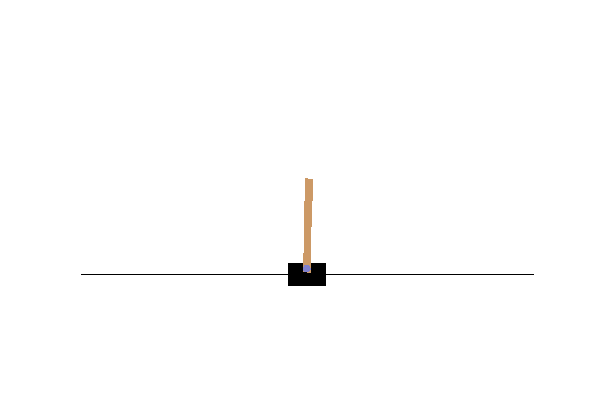
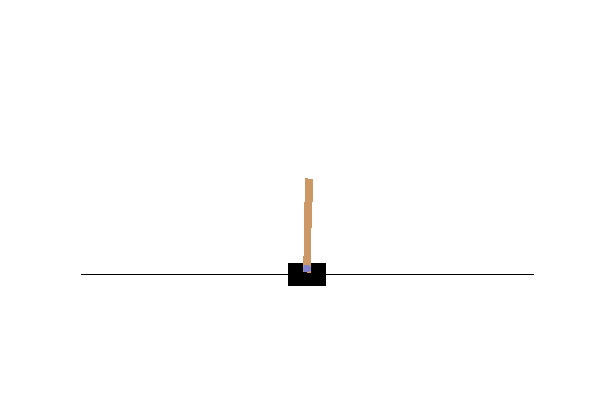
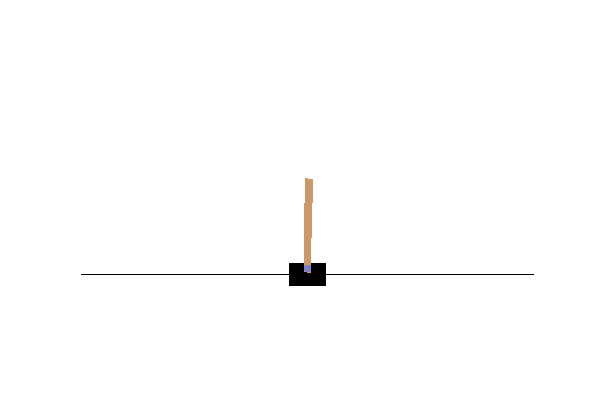
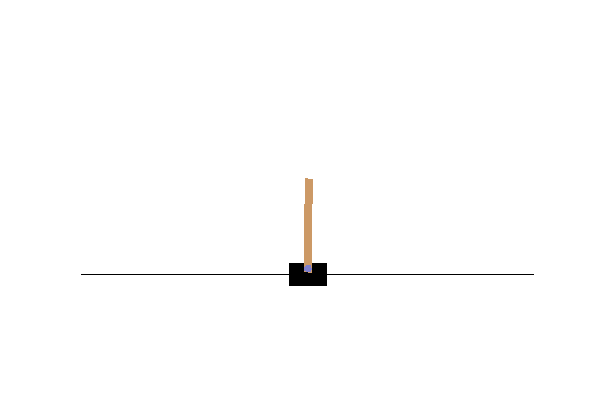
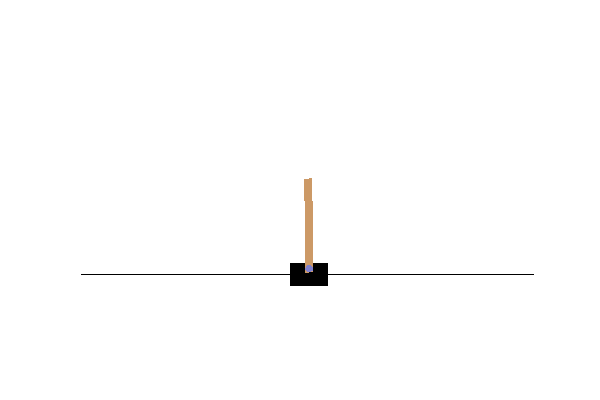
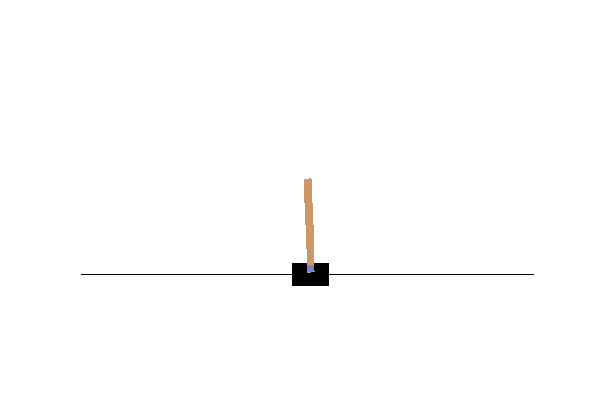
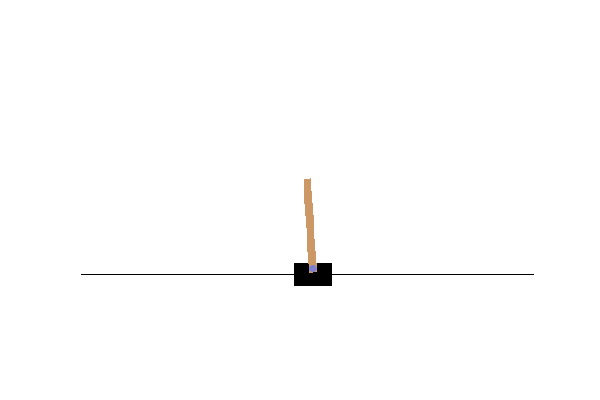
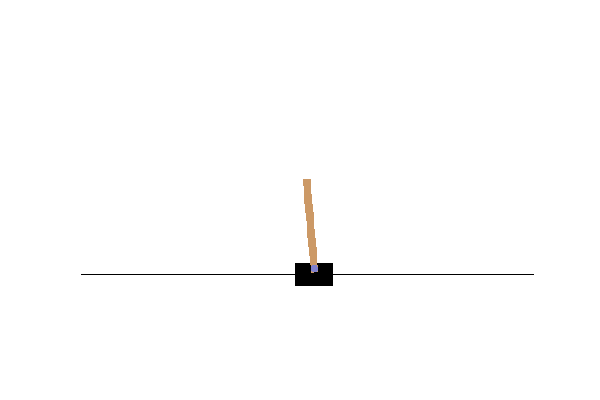
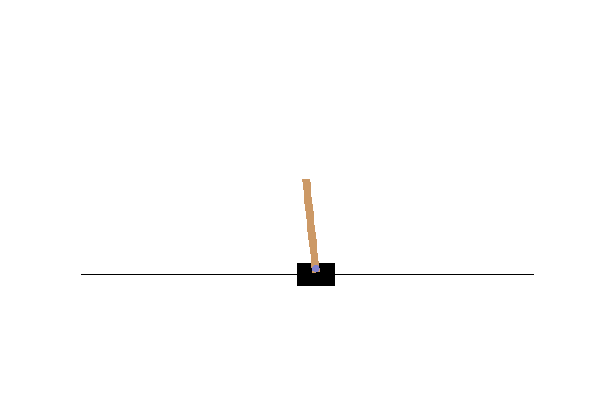
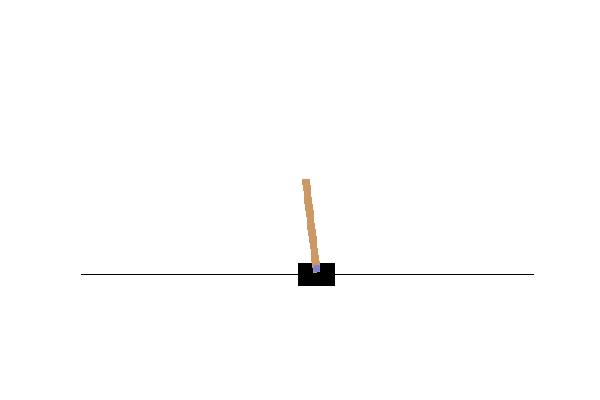
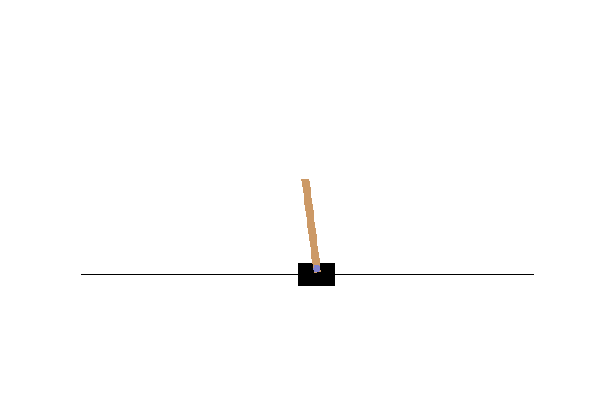
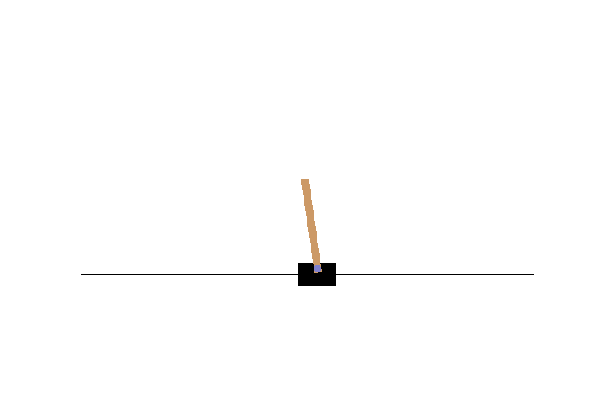
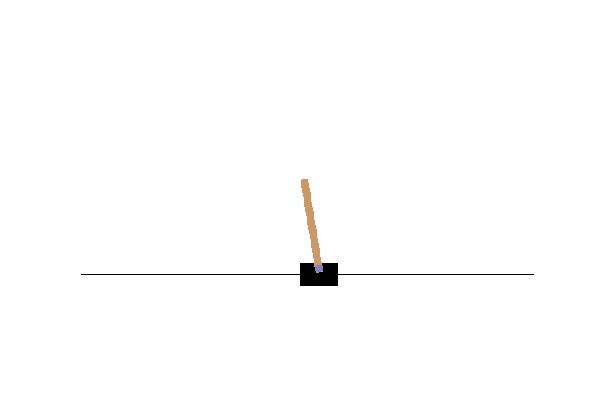
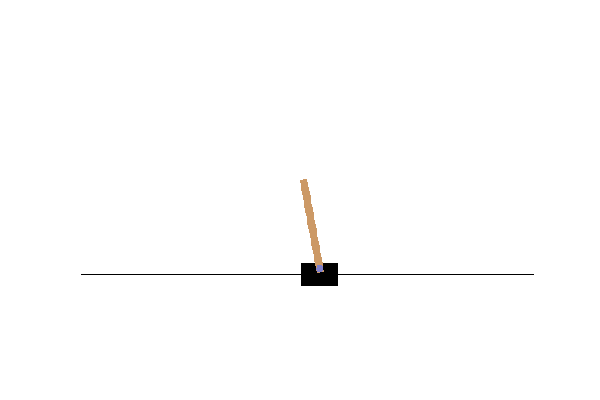
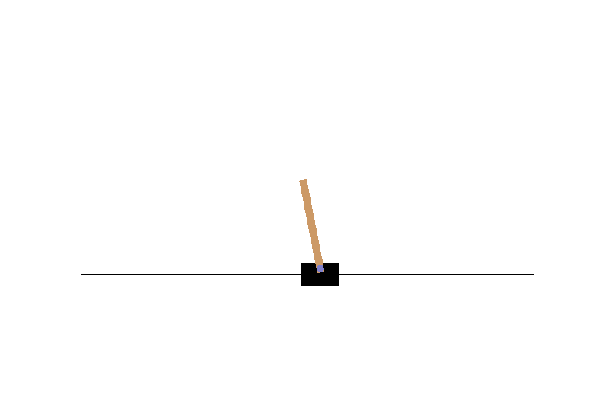
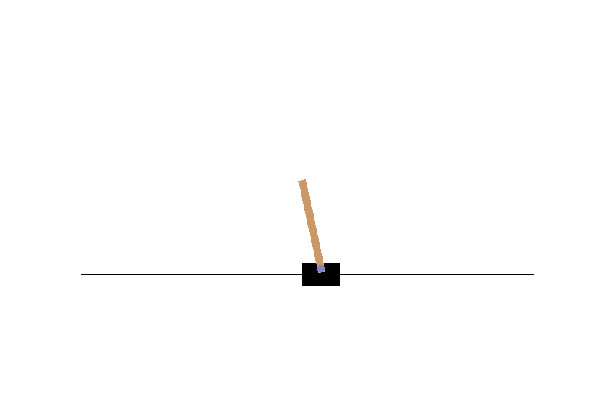

In [5]:
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, 'modelOutput/test', video_callable=False ,force=True)
# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    # This is where the agent will intervene later
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()
display_frames_as_gif(frames)


## Universal AI

### Import

In [1]:
import random
import gym
from gym import wrappers
import numpy as np
import os # for creating directories

from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


## Set parameters

At first we need to set up our environment. Monitor

In [2]:
environment = gym.make('CartPole-v0')

environment = wrappers.Monitor(environment, 'modelOutput/test', video_callable=False ,force=True)

As discussed befor we normally need as input for our dqn the individual frames of the game. In this way, the network has the greatest possible freedom to learn, for example, so vulnerabilities or specific dependencies between data can be found in games and exploited to get a higher score. In this example, we use OpenAi Gym, which gives us an abstracted form of the gamestate. It provides us with four values, which represent the state the game is in. This four values are the position and velocity of the cart, the angle and the angular velocity of the pole.

In [3]:
stateSize = environment.observation_space.shape[0]
stateSize

4

As the desired output we have just two values, whether the cart has to move left or right

In [4]:
actionSize = environment.action_space.n
actionSize

2

We choose a size for our training batch and the number of episodes.

In [ ]:
batchSize = 32
episodes = 4000

At last we make sure that a folder is created to safe our DQN

In [ ]:
outputDirectory = 'modelOutput/cartpole'

if not os.path.exists(outputDirectory):
    os.makedirs(outputDirectory)

# Define Agent

## Exercise

Following are three tasks in terms of building a DQNAgent. Here you find an overview of whats to come and some tips regarding the execises. The code is commented in order to clarify every step taken.

### Requirements: 
- Knowledge about the neural network basics.
- "Deep Reinforcment Learning - Theory" notebook, knowledge about deep reinforcement learning


### Task 1: Build a model for the DQN.
>In the previous notebook we have discussed the theory for this task, with an exemplary neural network, also we discussed our input and output above. {Verweis auf Basic Notebook?}

### Task 2: Implement a method in order to select a action.
>The action of the agent has to depent on whether it will be an random one or based on knowledge. We defined a epsilon in order to do this. The epsilon functions as a probability value. 

### Task 3: Train the DQN
>We chose the action with the highest Q-vlaue before and have to pay attention to the value range of epsilon.

In [ ]:
class DQNAgent:
    
    
    def __init__(self, stateSize, actionSize):
        
        # the size and shape of the input
        self.stateSize = stateSize
        # the size of the output
        self.actionSize = actionSize
        
        # initialization of the memory
        self.memory = deque(maxlen = 2000)
        
        # the discount factor for our Bellman equation
        self.gamma = .95
        
        # value that defines the percentage of exploration
        # 100% to exploration 0% to exploitation at the moment
        self.epsilon = 1.0 
        # the decaying rate
        # decreases exploration and increases exploitation
        self.epsilonDecay = .9965
        # the minimal percentage value for exploration
        self.epsilonMin = .001
        
        self.learningRate = .001
        
        self.model = self.buildModel()
        
    
    # build the model for the DQN
    def buildModel(self):
        
        model = Sequential()
        
        # Solution 1 --- START
        model.add(Dense(24, input_dim = self.stateSize, activation = 'relu'))
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(self.actionSize, activation = 'linear'))
        # Solution 1 --- END
        
        # use the mean squared error like discussed in the theory notebook
        model.compile(loss = 'mse', optimizer = Adam(lr = self.learningRate))
        
        return model
    
    # remember all the relevant information in order to train the DQN
    def remember(self, state, action, reward, nextState, done):
        
        self.memory.append((state, action, reward, nextState, done))
        
    
    # choose a suitable action
    def act(self, state):
        
        # Solution 2 --- START
        # the agent needs to take action according to the epsilon
        if np.random.rand() <= self.epsilon:
            # select an (explorational) random action
            return random.randrange(self.actionSize)
        
        # the exploitational actions
        actValues = self.model.predict(state)
        
        # return the suitable action
        return np.argmax(actValue[0])
        # Solution 2 --- END
        
    
    # train the model with the acquired data
    def replay(self, batchSize):
        
        # Solution 3 --- START -> 
        # select a sample of data for training
        miniBatch = random.sample(self.memory, batchSize)
        
        for state, action, reward, nextState, done in miniBatch:
            # select the actual reward as the target
            target = reward
            if not done:
                # use the Bellman equation for calculating the Q-value
                target = (reward + self.gamma * np.amax(self.model.predict(nextState)[0]))
                
            # use the temporal difference error to train the model 
            # predict the future reward, we need the Q-values
            targetF = self.model.predict(state)
            # map the target reward to the predicted reward
            targetF[0][action] = target
            # trian the model in order to maximize the Q-value
            self.model.fit(state, targetF, epochs = 1, verbose = 0)
            
        # In order to shift the behaviour of the agent more and more to 
        # exploitation of its current knowledge, adjust the epsilon.
        # condition for the epsilon decrease
        if self.epsilon > self.epsilonMin:
            # decrease the epsilon
            self.epsilon *= self.epsilonDecay
        # Solution 3 --- END  
        
    
    # load a trained model
    def load(self, name):
        self.model.load_weights(name)
       
    
    # save a trained model
    def save(self, name):
        self.model.save_weights(name)

## Summary

We build an agent which can interact with its environment via a DQN. Following are the components and abilities.

- Memory: The agent has a cyclic memory to remember related information about environment and reward. This memory then contains data with which the DQN can be trained. 

- DQN: The model for predicting the Q-values and choosing an action.

- Interaction: The agent can interact with the environment by choosing either an explorational and random action or a exploitational one, based on knowledge. 

- Training: We use Q-values and the states in order to train the DQN. The data needed is stored in the memory during earlier interactions with the environment. This way the network learns which actions should be prefered in a given state and which should be avoided. 

- Save and Load: We can save and load a trained DQN.


# Initialize Agent

In [ ]:
agent = DQNAgent(stateSize, actionSize)

## Interact with Environment

In [ ]:
done = False;

# buffer for rgb arrays to create a gif later on
frames = []

for e in range(episodes):
    state = environment.reset()
    state = np.reshape(state, [1, stateSize])
    
    for time in range(5000):
        action = agent.act(state)
        
        nextState, reward, done, _ = environment.step(action)
        
        reward = reward if not done else -10
        
        nextState = np.reshape(nextState, [1, stateSize])
        
        agent.remember(state, action, reward, nextState, done)
        
        state = nextState
        
        if e > episodes-6:
            frames.append(environment.render(mode = 'rgb_array'))
        
        
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}".format(e+1, episodes, time, agent.epsilon))
            
            if e > episodes-6:
                display_frames_as_gif(frames)
                frames.clear()
            break
        
    if len(agent.memory) > batchSize:
        agent.replay(batchSize)
    
    if e % 50 == 0:
        agent.save(outputDirectory + "weights " + '{:04d}'.format(e) 
                   + ".hdf5")

environment.close()

# Outlook <a name="outlook"></a>

# Sources <a name="sources"></a>

This notebook is based on the following articles/blogposts/tutorials:

[1] https://gym.openai.com/ - information about OpenAi Gym

[2] https://gym.openai.com/envs/CartPole-v1/ - information about the Cartpole environment of OpenAi Gym

[3] https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server - solutions for rendering epochs on a headless server

[4] https://www.youtube.com/watch?v=OYhFoMySoVs - code for a DQN